Data from the Taiwan Economic Journal for the years 1999–2009 representing company bankruptcy based on the business regulations of the Taiwan Stock Exchange.

In [182]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import os

import warnings
warnings.filterwarnings('ignore')

filename = "data.csv"
if not os.path.exists(filename):
    raise FileNotFoundError(f"{filename} does not exist")

df = pd.read_csv(filename)

# Preparation

### Exploration

In [183]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [185]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


### Cleaning

In [186]:
null_counts = df.isna().sum()
null_cols = null_counts[null_counts > 0].index.tolist()

if null_cols:
    for col in null_cols:
        print(f"{col}: {null_counts[col]} null values")
    print(f"Total number of null values: {null_counts.sum()}")
else:
    print("No null values found in the DataFrame.")

No null values found in the DataFrame.


### Normalization

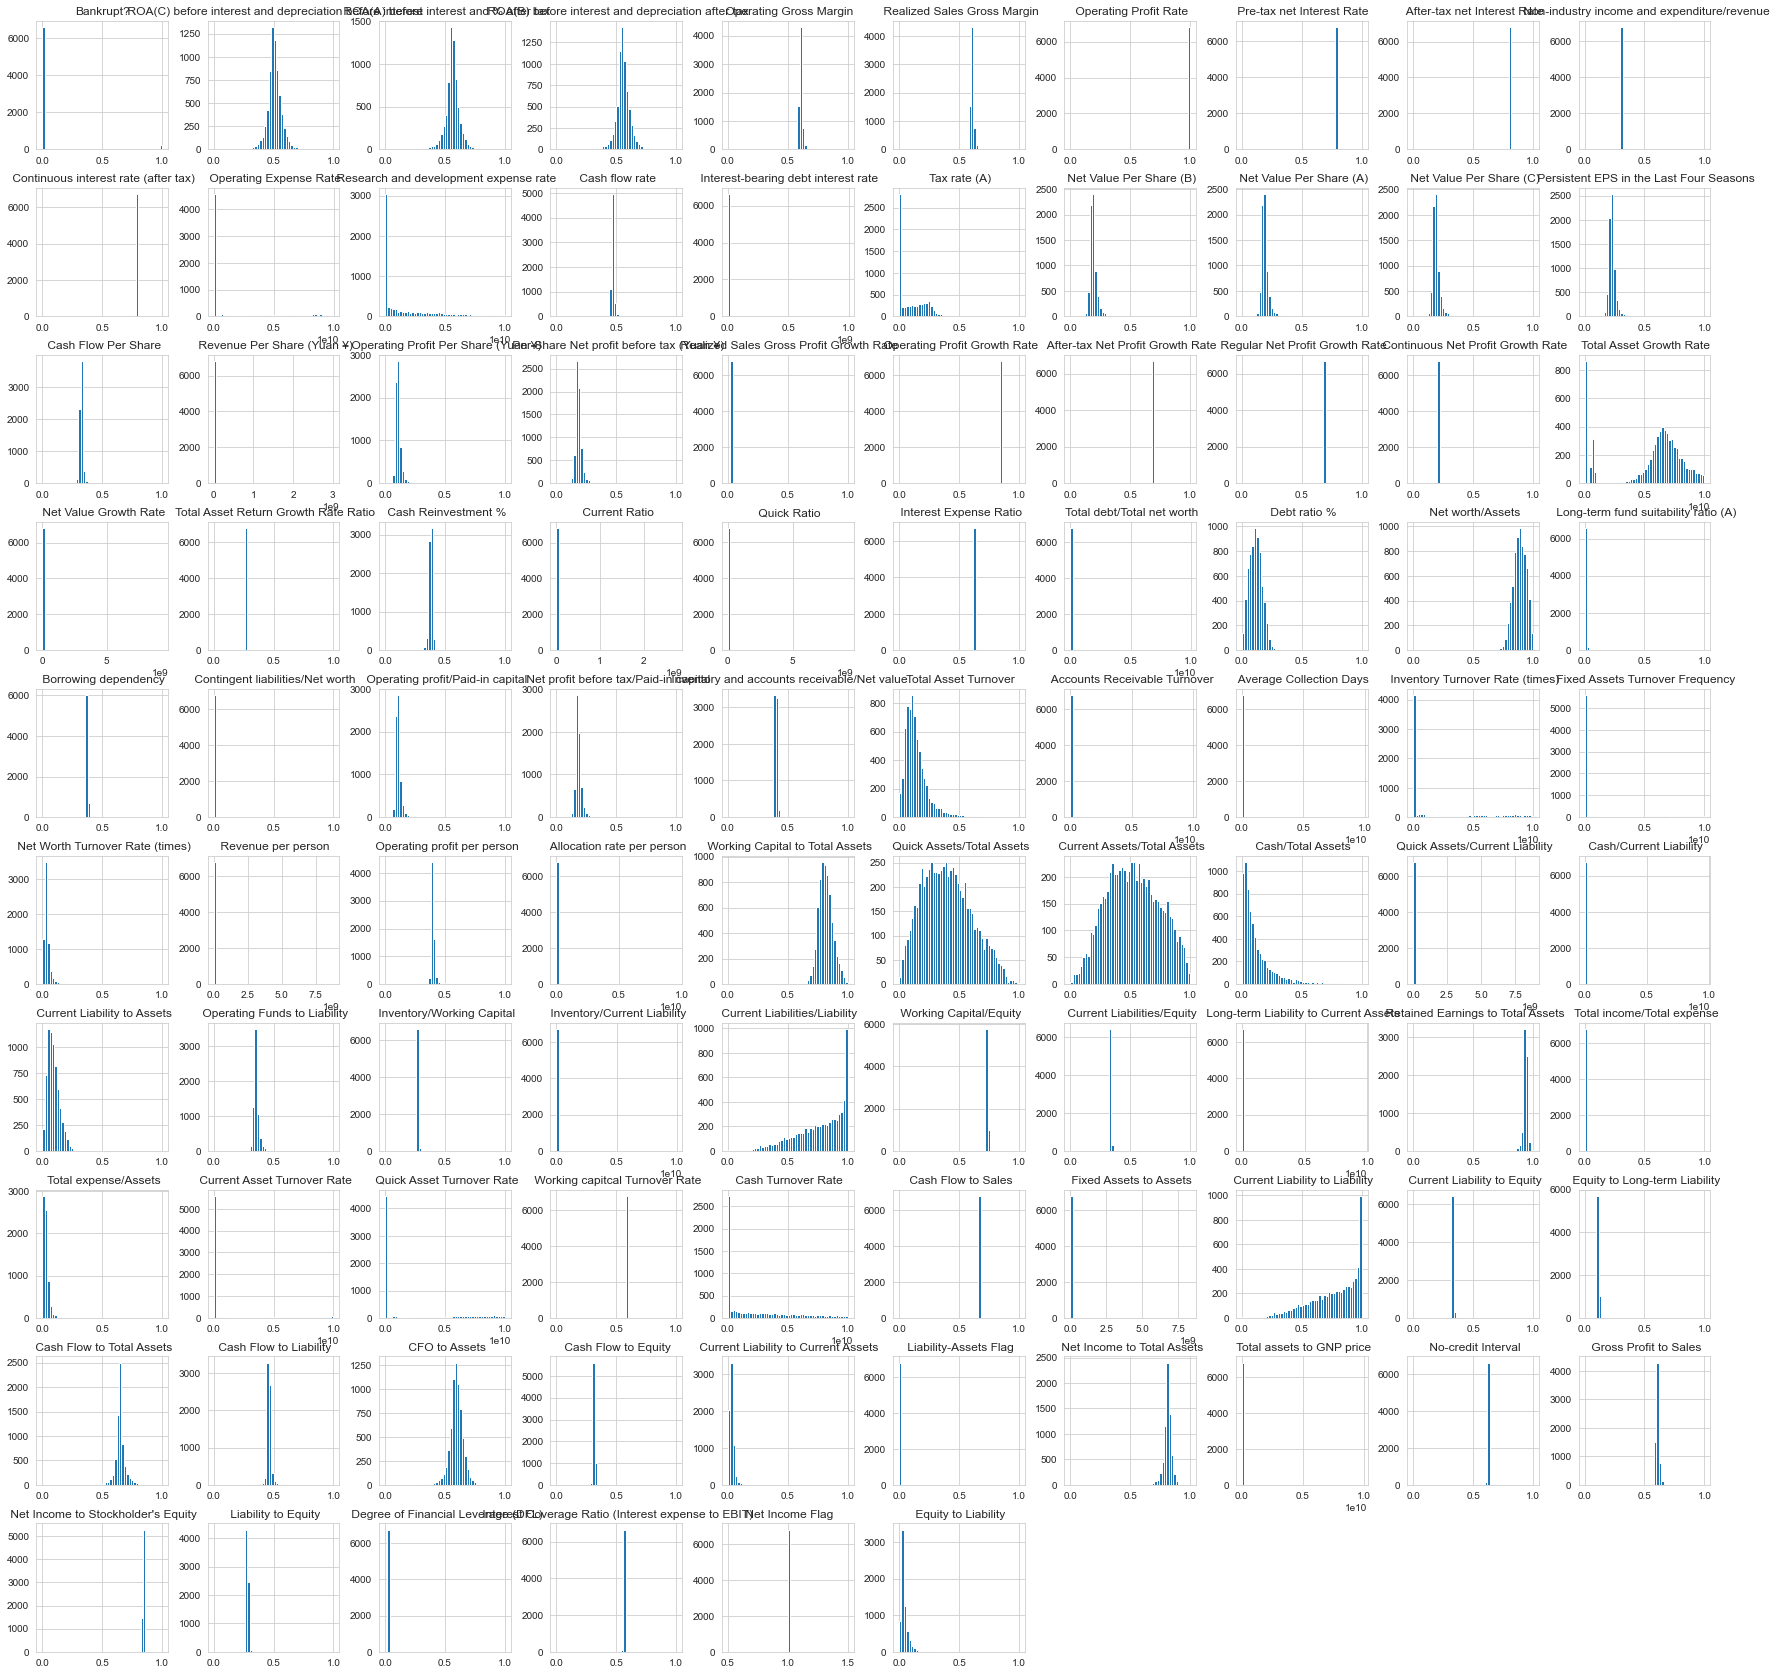

In [187]:
df.hist(figsize=(30,30), bins=50, edgecolor='white')
plt.show()

In [188]:
df.shape

(6819, 96)

In [189]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


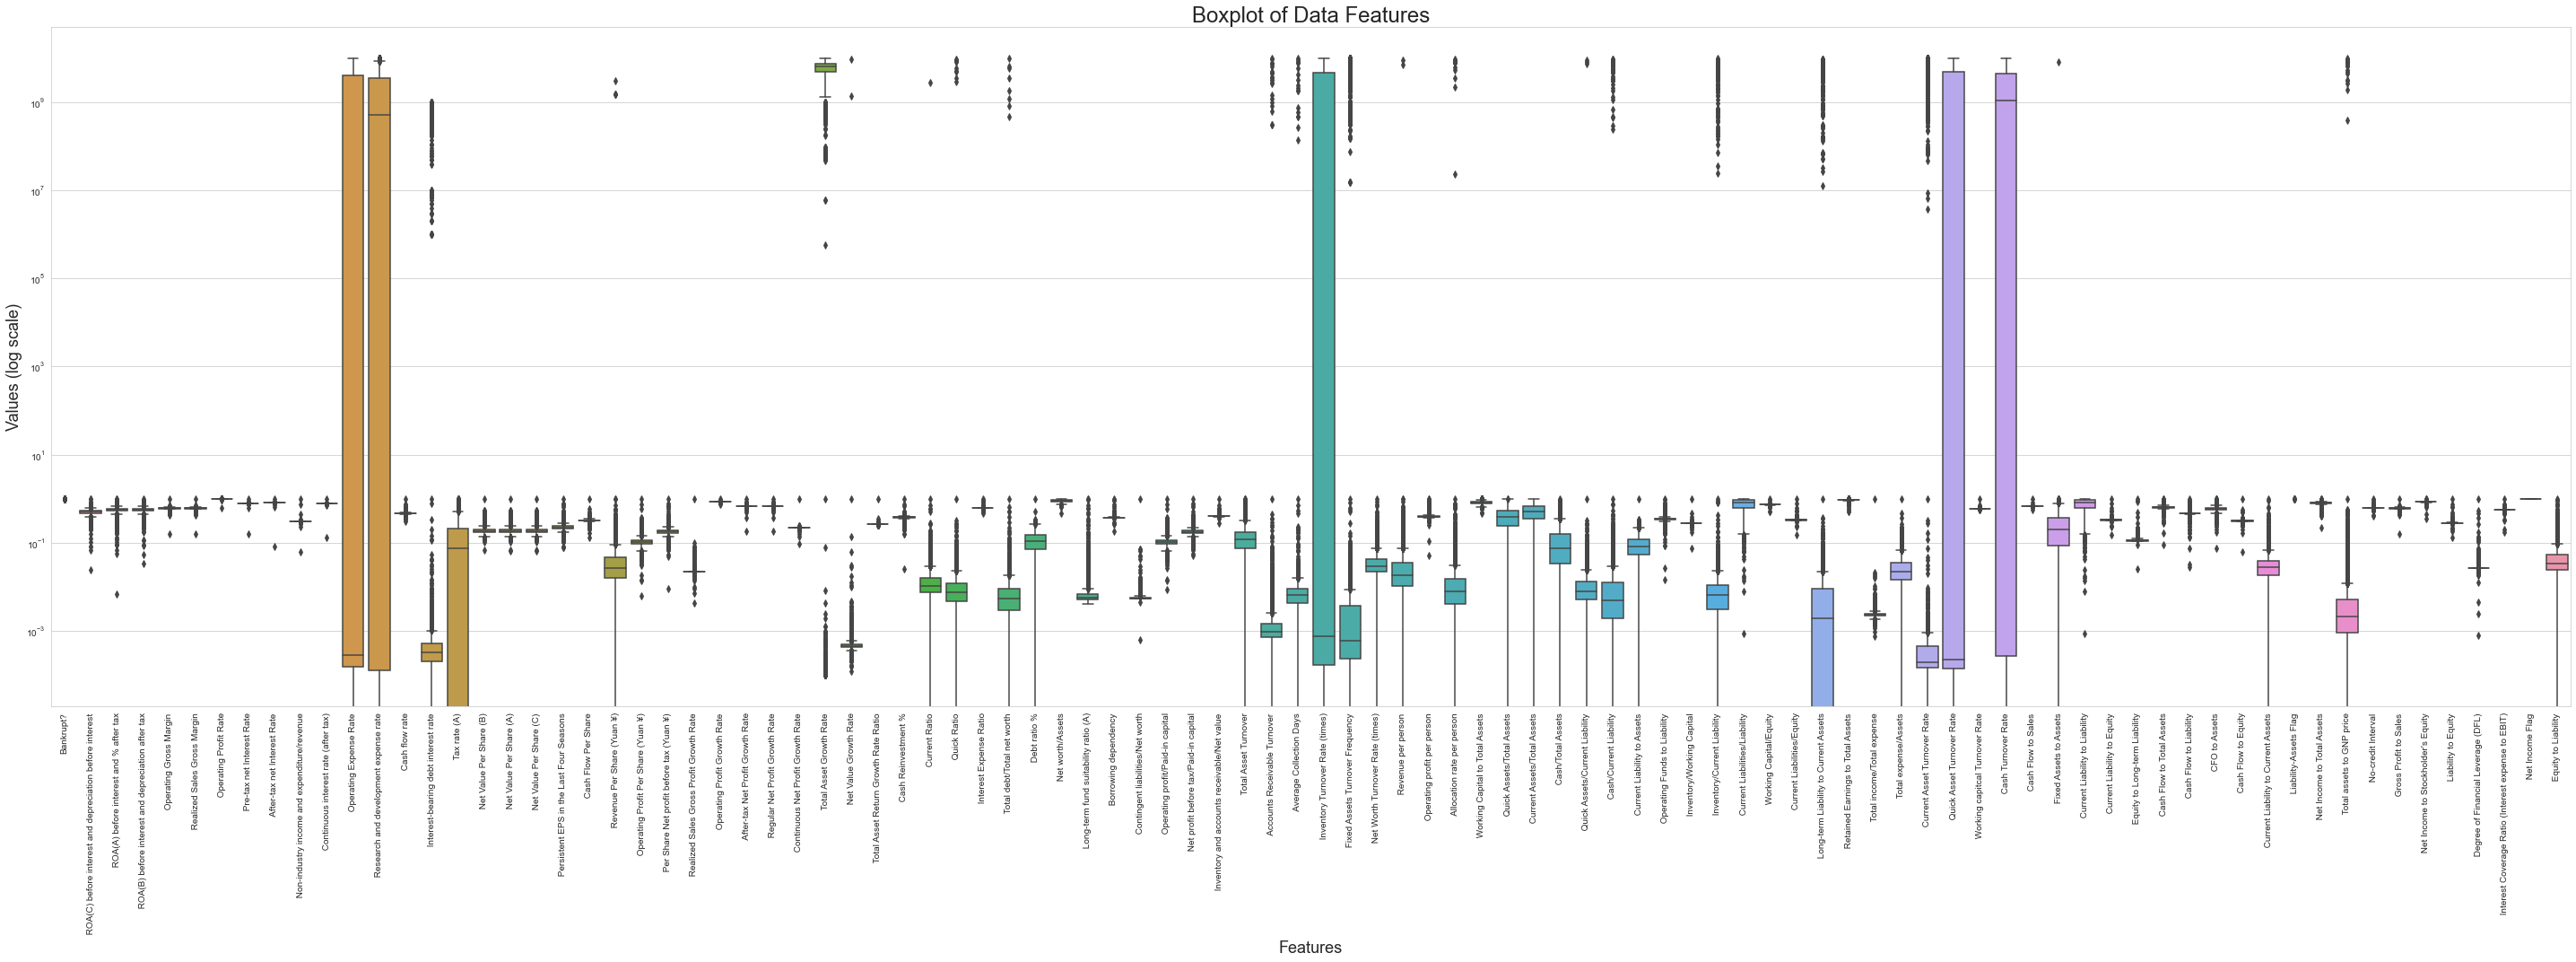

In [190]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(40, 15))
sns.boxplot(data=df, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yscale('log')

ax.set_title('Boxplot of Data Features', fontsize=24)
ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel('Values (log scale)', fontsize=18)

plt.tight_layout()
plt.savefig('boxplot.png')

plt.show()


In [191]:
print(len(df.columns))

96


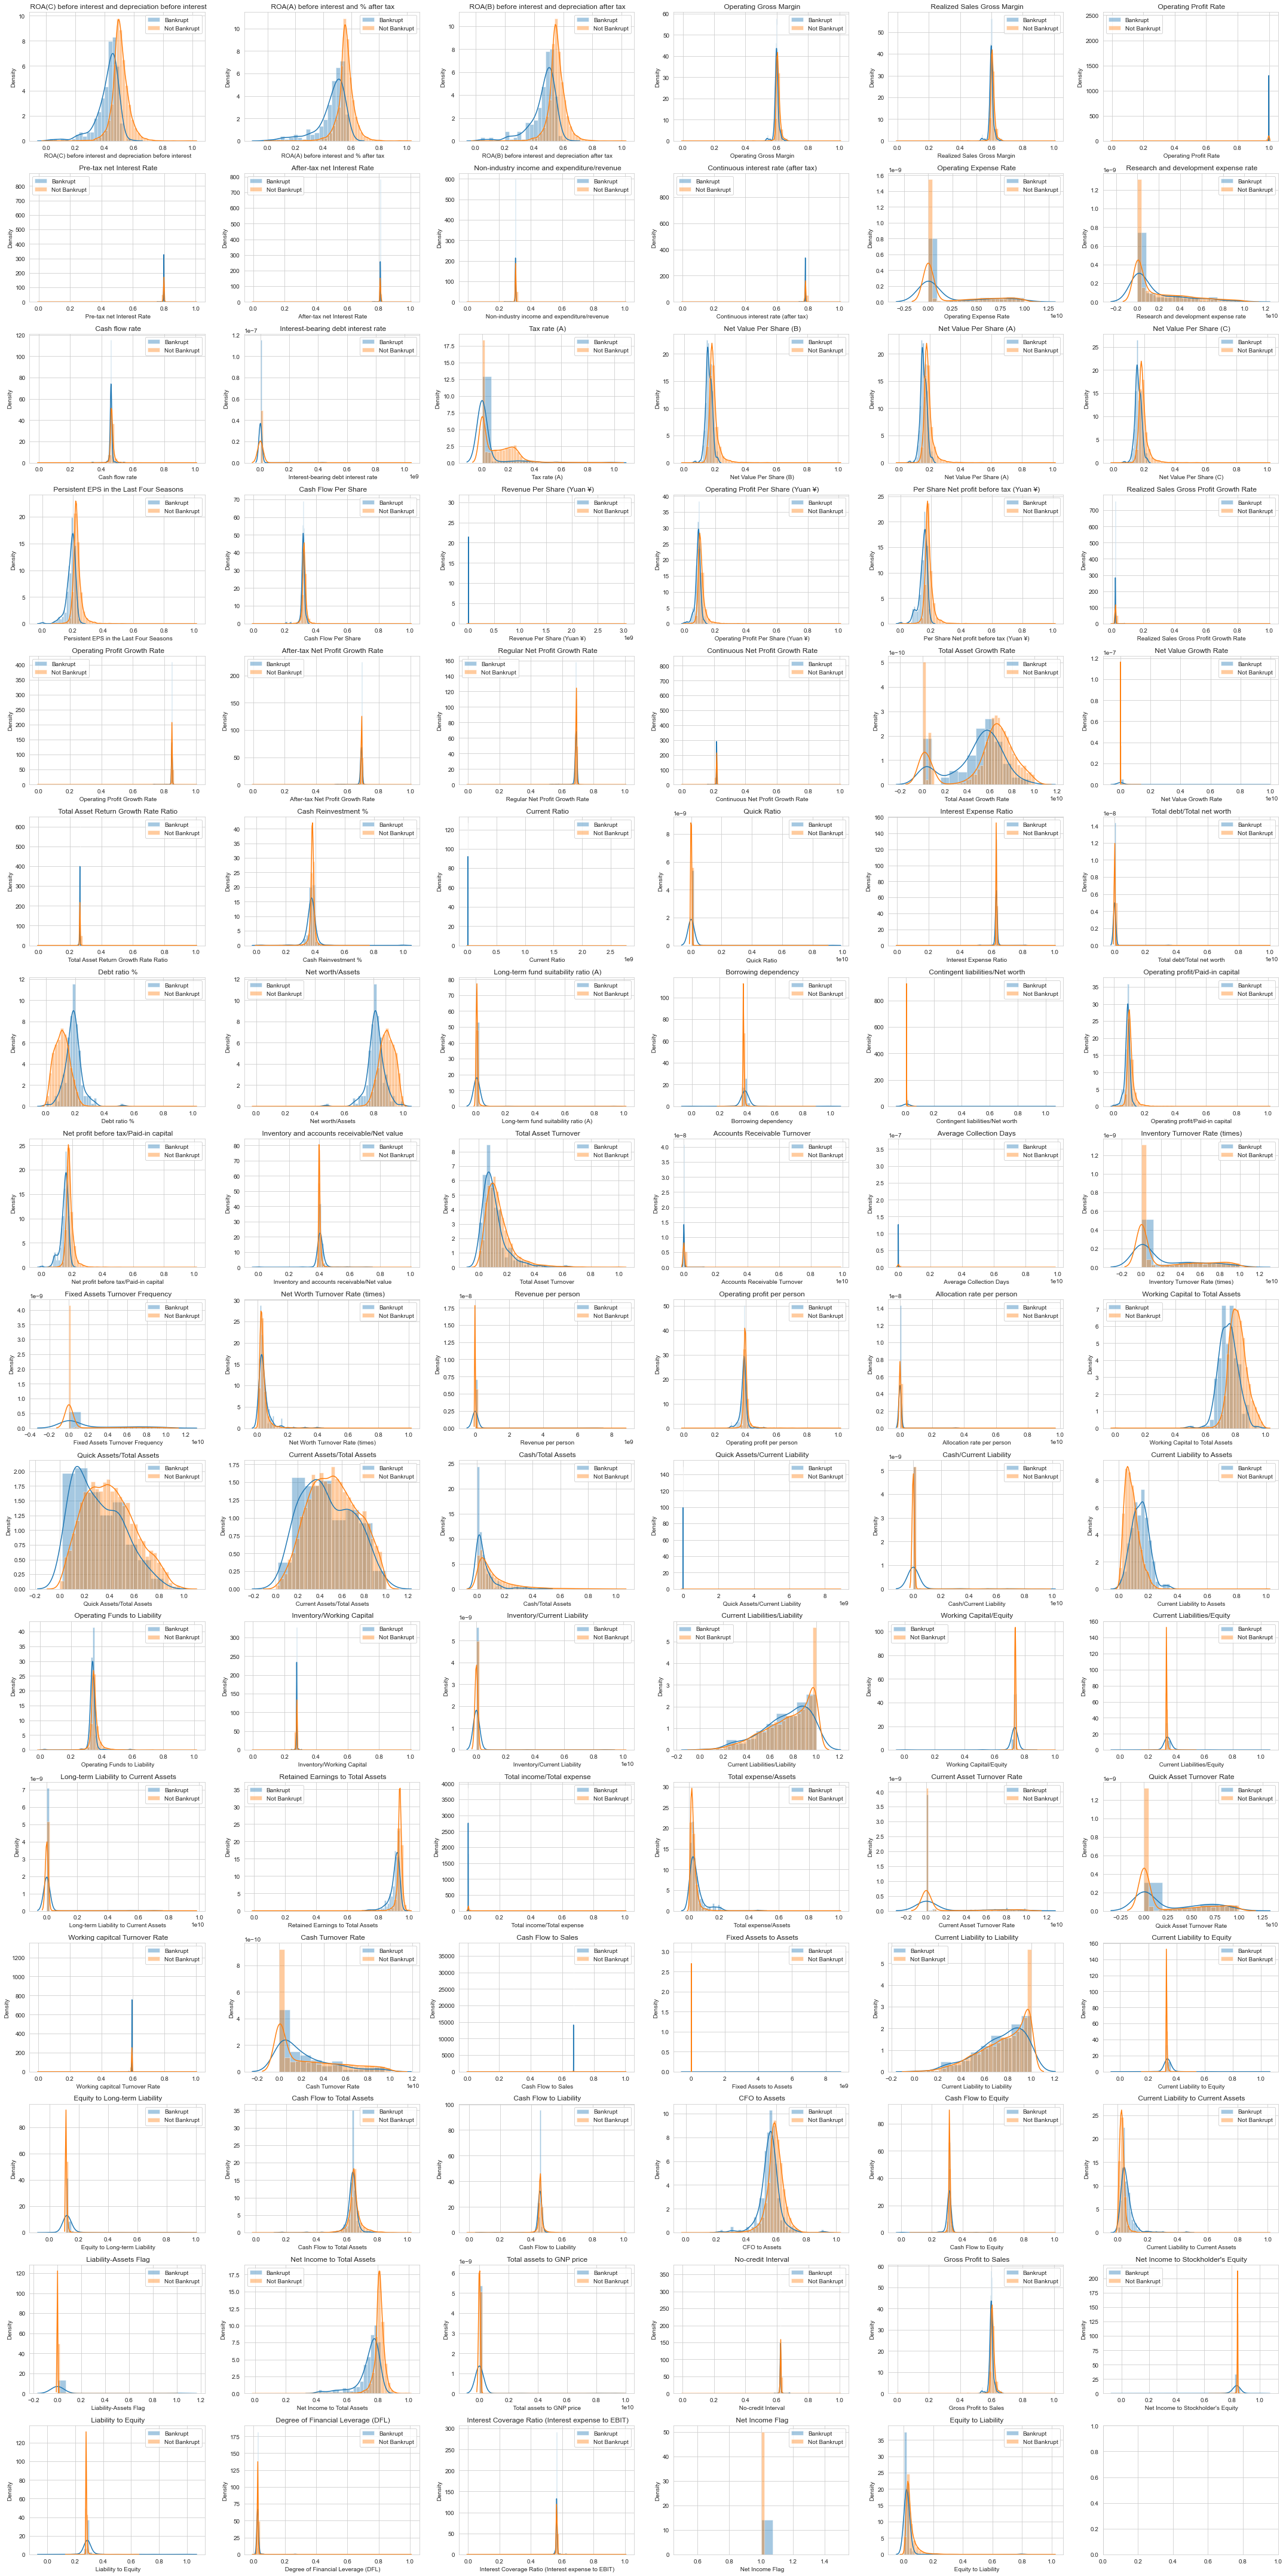

In [192]:
# Seperate df
bankrupt_df = df[df['Bankrupt?']==True]
not_bankrupt_df = df[df['Bankrupt?']==False]

# Analyze distributions of selected features using rfecv
cols = df.drop("Bankrupt?", axis=1).columns

# Create figure with subplots
fig, axs = plt.subplots(16, 6, figsize=(30,60))
axs = axs.ravel()

for i, feature in enumerate(cols):
    a = bankrupt_df[feature]
    b = not_bankrupt_df[feature]
    b = b.sample(n=len(a), random_state=42) # Take random sample from each feature to match length of target
    # Running t-tests
    test = stats.ttest_ind(a,b)
    sns.distplot(bankrupt_df[feature], kde=True, label="Bankrupt", ax=axs[i])
    sns.distplot(not_bankrupt_df[feature], kde=True, label="Not Bankrupt", ax=axs[i])
    axs[i].set_title("{}".format(feature))
    axs[i].legend()
plt.tight_layout()
plt.show()

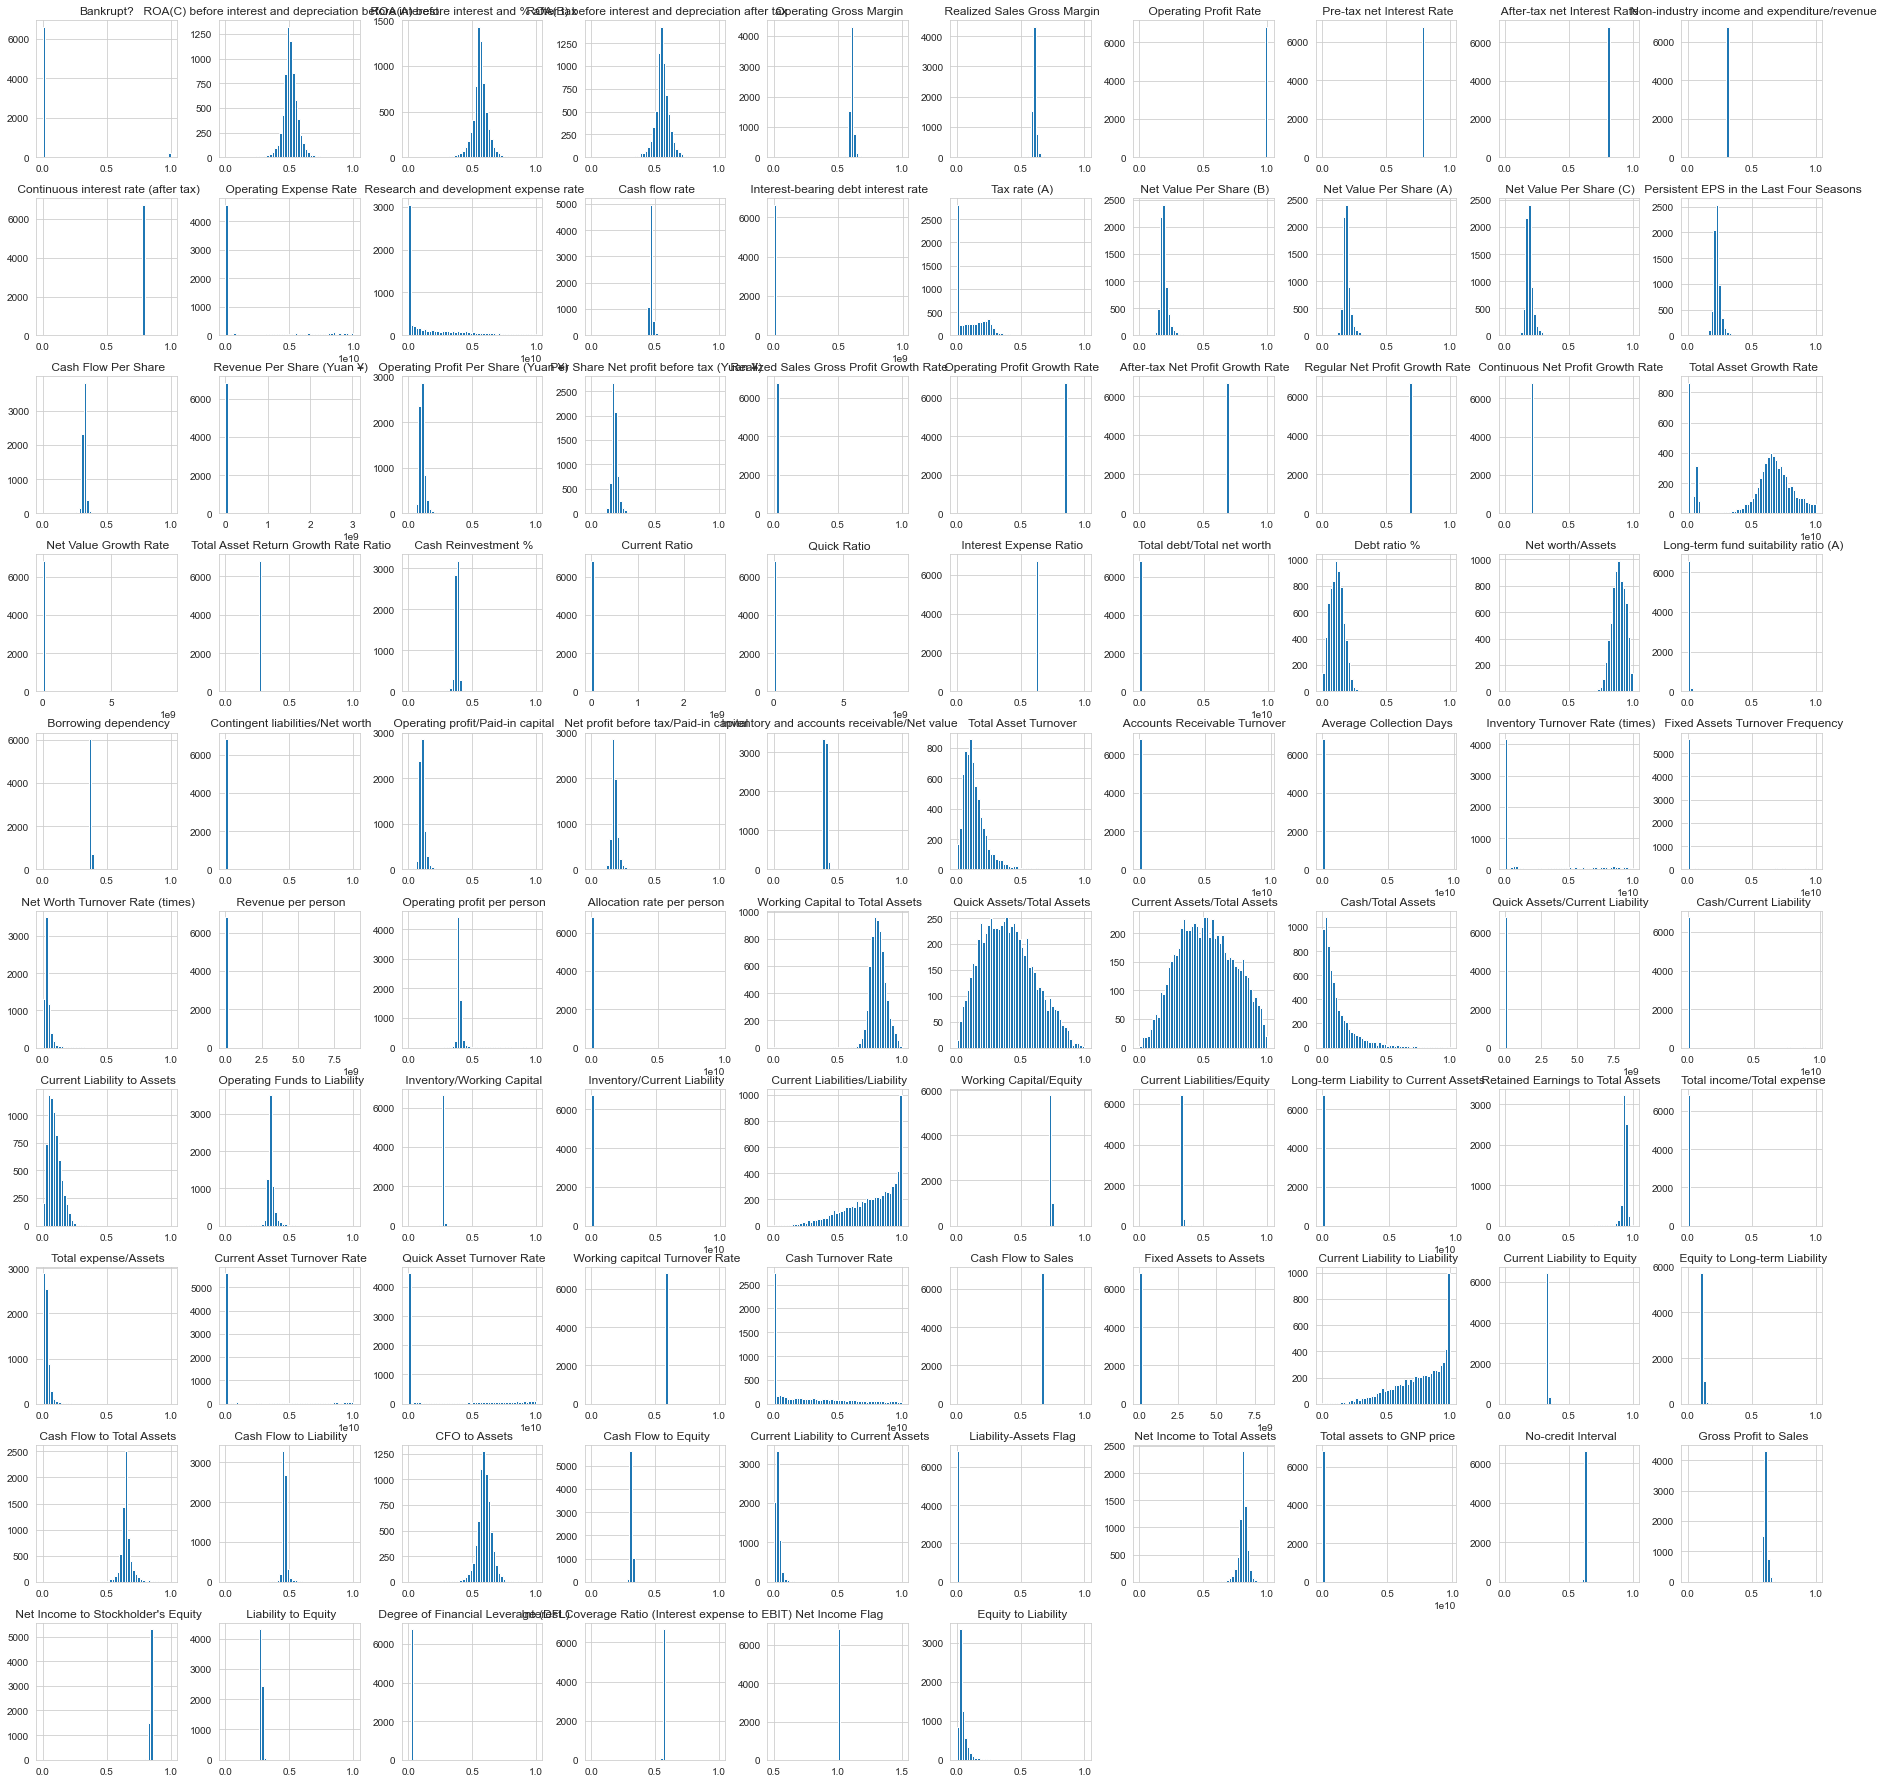

In [193]:
df.hist(figsize=(32,32), edgecolor='white', bins=50)
plt.show()

<AxesSubplot:>

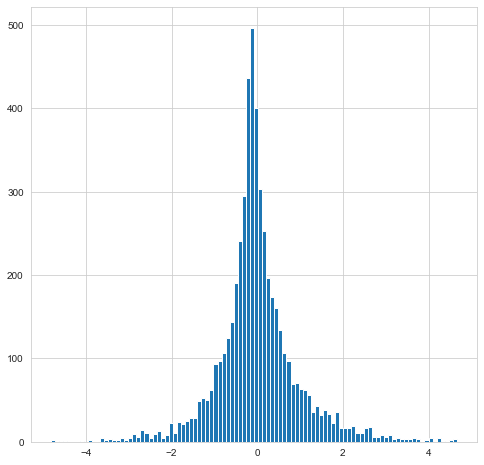

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop("Bankrupt?", axis = 1)
y = df["Bankrupt?"]

for i in X.columns:
   df[i] = scaler.fit_transform(df[i].values.reshape(-1, 1))
   df = df[(df[i] >= -5) & (df[i] <= 5)]

df[" Cash Flow to Equity"].hist(figsize=(8, 8), edgecolor='white', bins=100)


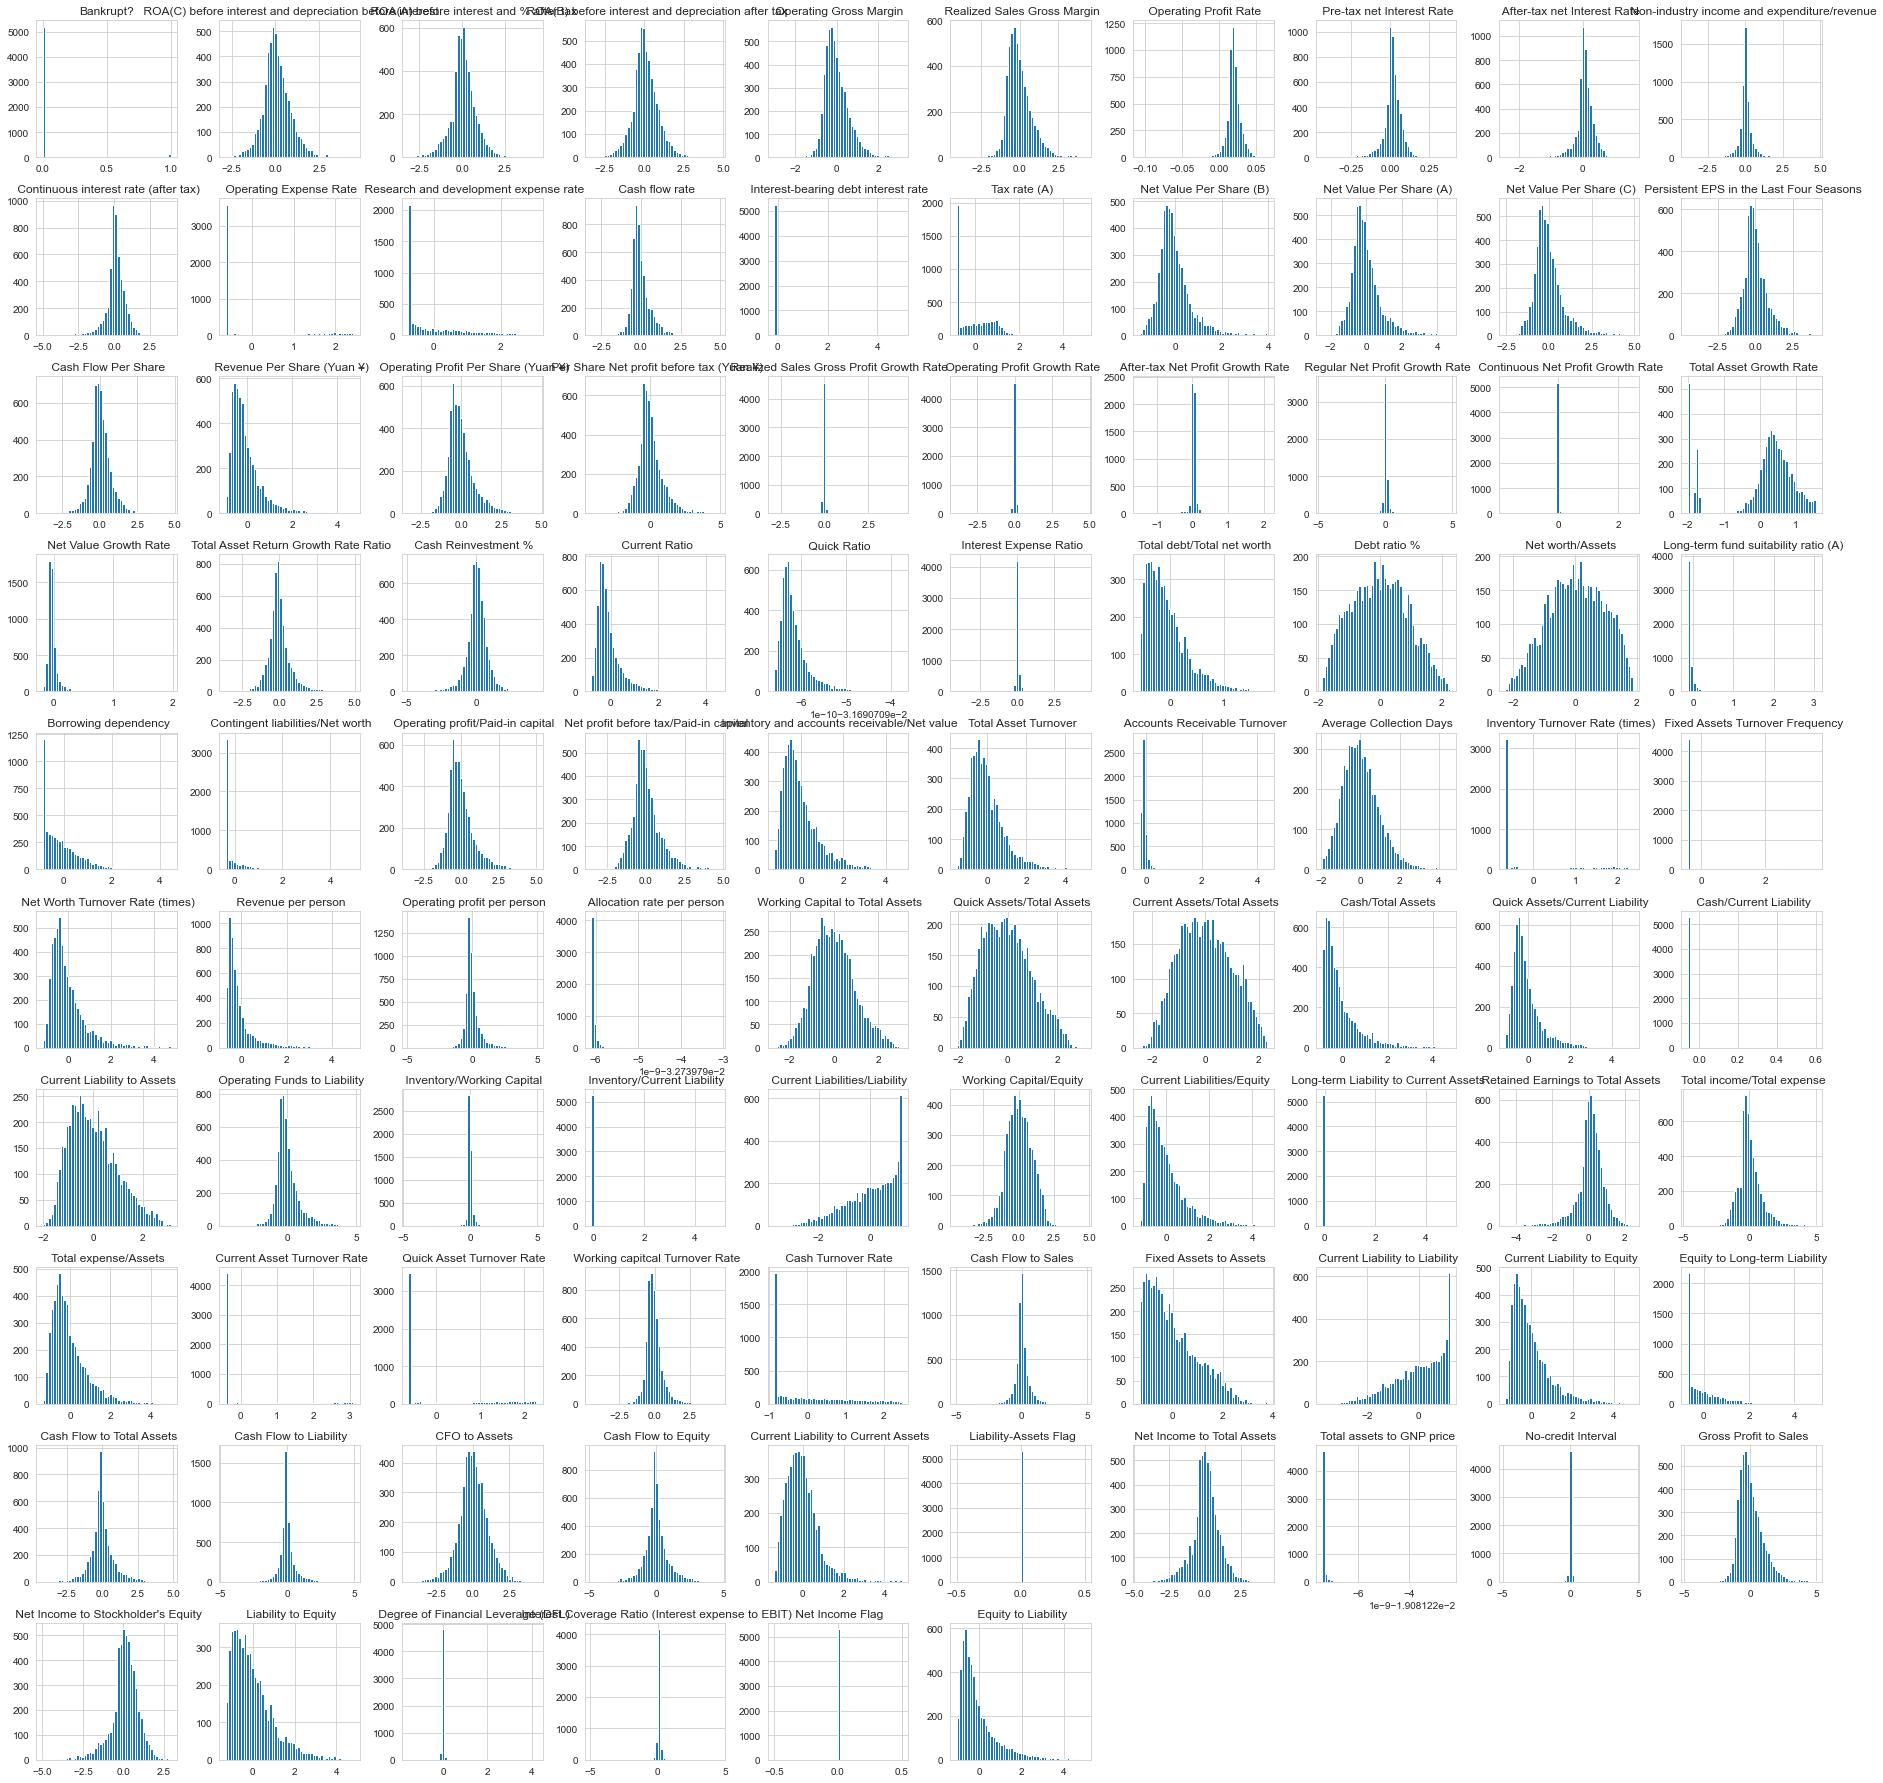

In [195]:
df.hist(figsize=(32,32), edgecolor='white', bins=50)
plt.show()

In [196]:
df = pd.DataFrame(df)

# Testing Different Models

### Initial Model

In [197]:
from sklearn.model_selection import train_test_split

X_original = X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.shape

(6819, 95)

In [198]:
from imblearn.over_sampling import RandomOverSampler

# Create the oversampler
oversampler = RandomOverSampler(sampling_strategy=1)

# Fit and transform the training data
X_train, y_train = oversampler.fit_resample(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval


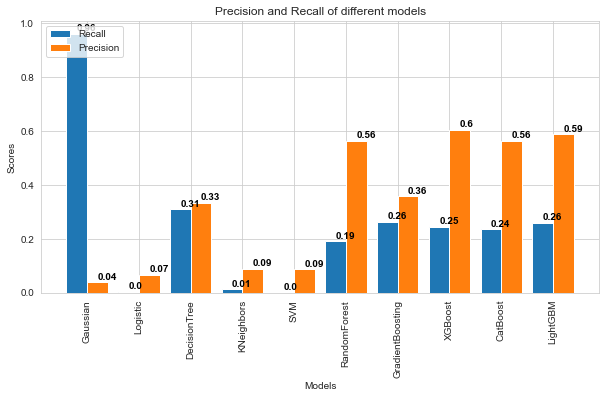

In [199]:
def find_model(mltask="classification", evaluate=False, plot=True):
    from sklearn.naive_bayes import GaussianNB as GNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
    import xgboost as xgb
    from sklearn.metrics import precision_score
    import matplotlib.pyplot as plt
    from sklearn.model_selection import cross_val_score
    from catboost import CatBoostClassifier
    from lightgbm import LGBMClassifier
    from sklearn.metrics import recall_score
    from sklearn.model_selection import StratifiedKFold

    # Create a StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    
    models = {
        "Gaussian": GNB(),
        "Logistic": LogisticRegression(),
        "DecisionTree": DecisionTreeClassifier(),
        "KNeighbors": KNeighborsClassifier(),
        "SVM": SVC(),
        "RandomForest": RandomForestClassifier(),
        "GradientBoosting": GradientBoostingClassifier(),
        "XGBoost": xgb.XGBClassifier(),
        "CatBoost": CatBoostClassifier(verbose=0),
        "LightGBM": LGBMClassifier(verbose_eval=False)
    }
    
    cv_scores = {}
    precision = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        from sklearn import metrics
        recall = cross_val_score(model, X, y, cv=skf, scoring="recall").mean()
        cv_scores[name] = recall
        precision_sc = precision_score(y_test, y_pred, pos_label=1)
        precision[name] = precision_sc
        
        if evaluate:
            print(name)
            print("Recall:", recall)
            print("Precision:", precision_sc)
            
            # Model Accuracy, how often is the classifier correct?
            print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
            print('Report:\n', metrics.classification_report(y_test, y_pred))
            print("----------")
    
    if plot:
        fig, ax = plt.subplots(figsize=(10,5))
        x = np.arange(len(models))
        ax.bar(x - 0.2, cv_scores.values(), width=0.4, label='Recall')
        ax.bar(x + 0.2, precision.values(), width=0.4, label='Precision')
        plt.xticks(x, cv_scores.keys(), rotation=90)
        plt.xlabel('Models')
        plt.ylabel('Scores')
        plt.title('Precision and Recall of different models')
        plt.legend(loc='upper left')
        for i, v in enumerate(cv_scores.values()):
            ax.text(i - 0.2, v + 0.01, str(round(v, 2)), color='black', fontweight='bold')
        for i, v in enumerate(precision.values()):
            ax.text(i + 0.2, v + 0.01, str(round(v, 2)), color='black', fontweight='bold')
        plt.show()

find_model(plot=True)

In [200]:
X.shape

(6819, 95)

### Feature Scaling

### Univariate Feature Selection

In [201]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

In [202]:
class UnivariateFeatureSelection:
  def __init__(self, n_features, problem_type, scoring):
    if problem_type == "classification":
      valid_scoring = {
        "f_classif": f_classif,
        "chi2": chi2,
        "mutual_info_classif": mutual_info_classif
      }
    else:
      valid_scoring = {
        "f_regression": f_regression,
        "mutual_info_regression": mutual_info_regression
      }
      
    # raise exception if we do not have a valid scoring method
    if scoring not in valid_scoring:
      raise Exception("Invalid scoring function")
    
    # if n_features is int, we use selectkbest
    # if n_features is float, we use selectpercentile
    if isinstance(n_features, int):
      self.selection = SelectKBest(
        valid_scoring[scoring],
        k=n_features
      )
    elif isinstance(n_features, float):
      self.selection = SelectPercentile(
        valid_scoring[scoring],
        percentile=int(n_features * 100)
      )
    else:
      raise Exception("Invalid type of feature")

  # same fit function
  def fit(self, X, y):
    return self.selection.fit(X, y)
  
  # same transform function
  def transform(self, X):
    return self.selection.transform(X)
  
  # same fit_transform function
  def fit_transform(self, X, y):
    return self.selection.fit_transform(X, y)

In [203]:
X_original = X.copy()

ufs = UnivariateFeatureSelection(
  n_features=0.6,
  problem_type="classification",
  scoring="f_classif"
)

ufs.fit(X, y)
X = ufs.transform(X)

columns = X_original.columns[ufs.selection.get_support()]
X = pd.DataFrame(X, columns=columns)
print(X.shape)

(6819, 57)


[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval


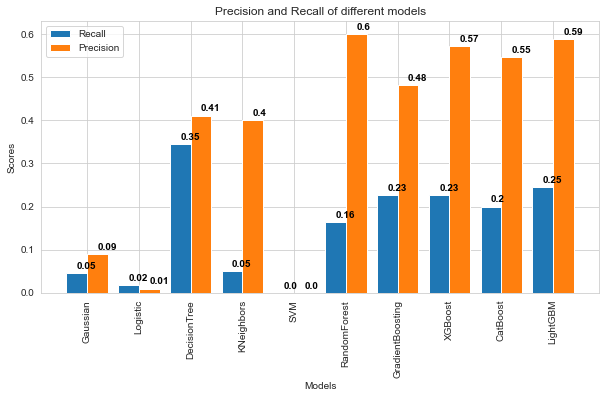

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

find_model(plot=True)

In [205]:
X_original = X.copy()

ufs = UnivariateFeatureSelection(
  n_features=0.6,
  problem_type="classification",
  scoring="f_classif"
)

ufs.fit(X, y)
X = ufs.transform(X)

columns = X_original.columns[ufs.selection.get_support()]
X = pd.DataFrame(X, columns=columns)
print(X.shape)

(6819, 34)


[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval


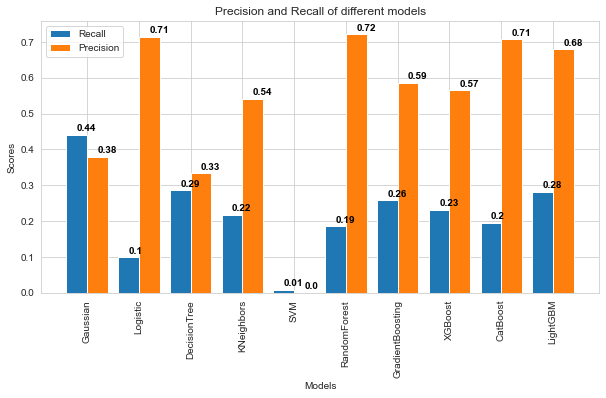

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

find_model(plot=True)

In [207]:
X_original = X.copy()

ufs = UnivariateFeatureSelection(
  n_features=0.6,
  problem_type="classification",
  scoring="f_classif"
)

ufs.fit(X, y)
X = ufs.transform(X)

columns = X_original.columns[ufs.selection.get_support()]
X = pd.DataFrame(X, columns=columns)
print(X.shape)

(6819, 20)


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval


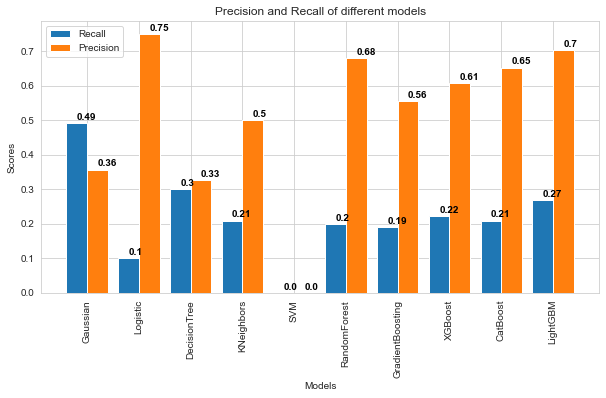

In [209]:
find_model(plot=True)

In [210]:
X_original = X.copy()

ufs = UnivariateFeatureSelection(
  n_features=0.6,
  problem_type="classification",
  scoring="f_classif"
)

ufs.fit(X, y)
X = ufs.transform(X)

columns = X_original.columns[ufs.selection.get_support()]
X = pd.DataFrame(X, columns=columns)
print(X.shape)

(6819, 12)


[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval


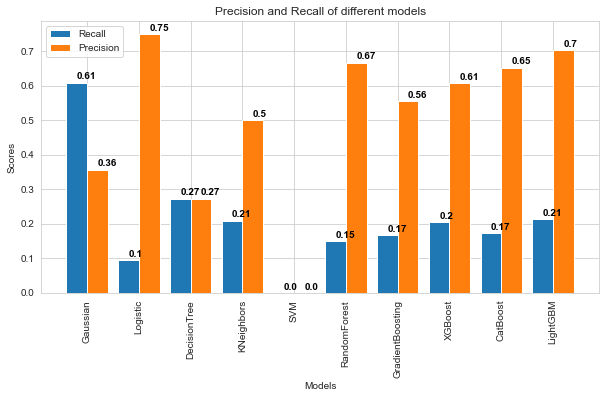

In [211]:
find_model(plot=True)

In [212]:
X.shape

(6819, 12)

# Fine Tuning

### Model

In [222]:
# import LGBMClassifier
from lightgbm import LGBMClassifier

# Create the model
model = LGBMClassifier()


### Hyperparameter Tuning

In [223]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

feature_1 = "subsample"
feature_2 = "colsample_bytree"

feature_1_values = np.linspace(0.1, 1, 15)
feature_2_values = np.linspace(0.1, 1, 15)

param_grid = {"max_depth":[4, 6,  8], "learning_rate":[0.2,  0.3,  0.4], "subsample":[0.6,  0.8,  1], "colsample_bytree":[0.4, 0.6, 0.7]}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, scoring="f1", verbose=-1, cv=3)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.4, 0.6, 0.7],
                         'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [4, 6, 8], 'subsample': [0.6, 0.8, 1]},
             scoring='f1', verbose=-1)

In [224]:
# Calculate the accuracy of the predictions
accuracy = grid_search.score(X_test, y_test)
print(accuracy)

# See best parameter combination
print(grid_search.best_params_)

0.3584905660377358
{'colsample_bytree': 0.4, 'learning_rate': 0.2, 'max_depth': 6, 'subsample': 0.6}


### Evaluation

In [230]:
from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.68      0.24      0.36        78

    accuracy                           0.97      2046
   macro avg       0.82      0.62      0.67      2046
weighted avg       0.96      0.97      0.96      2046



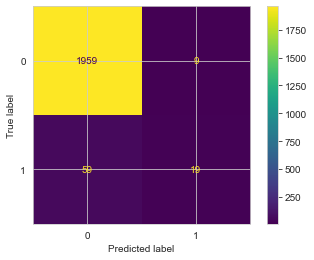

In [226]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)